In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import folium

# 表示の幅を広げる
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
rcParams['figure.figsize'] = 8, 8 # グラフが見きれないようにするためサイズを大きくしておく

# 住宅情報(2015年)

In [2]:
!pip install mojimoji
import mojimoji

In [3]:
URL0= "https://raw.githubusercontent.com/idosatoshi0118/python/main/%E5%B0%8F%E5%A3%B2%E7%B3%BB%E4%BC%81%E6%A5%AD%E3%82%A4%E3%83%B3%E3%82%BF%E3%83%BC%E3%83%B3/2015%E5%9B%BD%E6%94%BF%E8%AA%BF%E6%9F%BB%E3%83%BB%E5%B0%8F%E5%9C%B0%E5%9F%9F%E9%9B%86%E8%A8%88.csv"
kokuzei0 = pd.read_csv(URL0, low_memory=False)
kokuzei0 = kokuzei0[kokuzei0["市区町村名"].str.endswith('区')]
    
# "丁"を削除し数値のみにする
new = kokuzei0['字・丁目名'] .str.split("丁", n = 1, expand = True) 

# 欠損値を0に置換
new.fillna({0:0}, inplace=True) 
kokuzei0["字・丁目名"] = new[0]

# int型をstr型に変換し、全角数字を半角数字にする
kokuzei0['字・丁目名'] = kokuzei0['字・丁目名'].astype('str')
kokuzei0['字・丁目名'] = kokuzei0["字・丁目名"].apply(mojimoji.zen_to_han)

# 必要な項目のみ抽出
on = ["都道府県名","市区町村名","大字・町名","字・丁目名","一般世帯総数（住居の種類・住宅の所有の関係）","住宅に住む一般世帯","主世帯","持ち家",
      "民営の借家","給与住宅","住宅に住む一般世帯.1","主世帯.1","持ち家.1"]
kokuzei2 = kokuzei0[on]

kokuzei2['大字・町名'] = kokuzei2["大字・町名"].str.replace("鴬谷町","鶯谷町")

<ipython-input-3-0d2768bd2fcb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kokuzei2['大字・町名'] = kokuzei2["大字・町名"].str.replace("鴬谷町","鶯谷町")


,都道府県名,市区町村名,大字・町名,字・丁目名,一般世帯総数（住居の種類・住宅の所有の関係）,住宅に住む一般世帯,主世帯,持ち家,民営の借家,給与住宅,住宅に住む一般世帯.1,主世帯.1,持ち家.1
0,東京都,千代田区,NaN,0,33201,30419,30115,13226,12757,2925,54140,53608,27013
1,東京都,千代田区,丸の内,0,X,X,X,X,X,X,X,X,X
2,東京都,千代田区,丸の内,1,X,X,X,X,X,X,X,X,X
3,東京都,千代田区,丸の内,2,X,X,X,X,X,X,X,X,X
4,東京都,千代田区,丸の内,3,X,X,X,X,X,X,X,X,X


# 世帯所得情報（2015）

In [5]:
URL1 = "https://raw.githubusercontent.com/idosatoshi0118/python/main/%E5%B0%8F%E5%A3%B2%E7%B3%BB%E4%BC%81%E6%A5%AD%E3%82%A4%E3%83%B3%E3%82%BF%E3%83%BC%E3%83%B3/%E6%9D%B1%E4%BA%AC%E9%83%BD%E4%B8%96%E5%B8%AF%E5%8F%8E%E5%85%A52015.csv"
TYO_income = pd.read_csv(URL1, low_memory=False) #from e-stat
TYO_income.rename(columns={'市区町村':'市区町村名'}, inplace = True) #ラベル名変更

# 高級住宅街のリスト

In [7]:
URL2 = 'https://raw.githubusercontent.com/idosatoshi0118/python/main/%E5%B0%8F%E5%A3%B2%E7%B3%BB%E4%BC%81%E6%A5%AD%E3%82%A4%E3%83%B3%E3%82%BF%E3%83%BC%E3%83%B3/%E3%82%A8%E3%83%AA%E3%82%A2(%E5%8C%BA)%E3%81%93%E3%82%99%E3%81%A8%E3%81%AE%E8%B2%B7%E5%8F%96%E7%B7%8F%E9%A1%8D%20-%20%E9%AB%98%E7%B4%9A%E6%8C%81%E3%81%A1%E5%AE%B6%E3%82%A8%E3%83%AA%E3%82%A2.csv'
dff = pd.read_csv(URL2, low_memory=False)
dff["市区町村名"] = dff["市区町村名"] + "区"

# 必要な要素のみ抽出
on = ["市区町村名","大字・町名","字・丁目名"]
rich_nbhd = dff[on]

# 欠損値の補完
rich_nbhd.fillna({'字・丁目名':0}, inplace=True)
rich_nbhd["字・丁目名"] = rich_nbhd["字・丁目名"].astype(int)
rich_nbhd["字・丁目名"] = rich_nbhd["字・丁目名"].astype(str)

/Users/satoshiido/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-7-e31e6c1aa6a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rich_nbhd["字・丁目名"] = rich_nbhd["字・丁目名"].astype(int)
<ipython-input-7-e31e6c1aa6a9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

# 各dfを結合させる 

In [227]:
df0 = pd.merge(rich_nbhd, TYO_income, on='市区町村名', how='left')
df1 = pd.merge(df0, kokuzei2, on = ["市区町村名", "大字・町名", "字・丁目名"], how='left')

## 必要な情報を追加する

In [229]:
# 各年齢層の割合
df1['45~64才の割合']  = (df1["55〜64"] + df1["45〜54"]) / df1["普通世帯総数"]
df1['65才以上の割合'] = df1["65歳以上"] / df1["普通世帯総数"]


# 各世帯収入の割合 # これは税法で終えている部分であって自営業主などの収入は反映されずらい可能性もある
df1['700~1000万の割合'] = df1["700〜1000"] / (df1["300万円未満"]+df1["300〜500"]+df1["500〜700"]+df1["700〜1000"]+df1["1000万円以上"])
df1['1000万以上の割合'] = df1["1000万円以上"] / (df1["300万円未満"]+df1["300〜500"]+df1["500〜700"]+df1["700〜1000"]+df1["1000万円以上"])

# 持ち家比率を計算（これが企業と個人で混在している可能性はある）
df1["主世帯"] = df1["主世帯"].astype(int)
df1["持ち家"] = df1["持ち家"].astype(int)
df1["持ち家比率"] = df1['持ち家'] / df1['主世帯']

# 自営業主比率を計算
df1['自営業主比率'] = df1['自営業主'] / (df1['自営業主']+df1['雇用者']+df1['無職']+df1['その他'])

#後で結合するために"住所1"列を作成
df1['住所1'] = df1['大字・町名'].str.cat(df1['字・丁目名'])

In [308]:
df1
#kokuzei2

,市区町村名,大字・町名,字・丁目名,ID,県,普通世帯総数,25歳未満,25〜34歳,35〜44,45〜54,55〜64,65歳以上,自営業主,農林・漁業業主,商工・その他の業主,雇用者,会社・団体・公社又は個人に雇われている者,官公庁,労働者派遣事業所の派遣社員,パート・アルバイト・その他,無職,学生,その他,300万円未満,300〜500,500〜700,700〜1000,1000万円以上,都道府県名,一般世帯総数（住居の種類・住宅の所有の関係）,住宅に住む一般世帯,主世帯,持ち家,民営の借家,給与住宅,住宅に住む一般世帯.1,主世帯.1,持ち家.1,45~64才の割合,65才以上の割合,700~1000万の割合,1000万以上の割合,持ち家比率,自営業主比率,住所1,45~64才の割合(標準化),65才以上の割合(標準化),700~1000万の割合（標準化）,1000万以上の割合(標準化),持ち家比率(標準化),自営業主比率(標準化)
0,品川区,東五反田,1,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1733,1723,1713,595,1065,53,2641,2623,1131,0.289970,0.262896,0.154202,0.130906,0.347344,0.107203,東五反田1,0.441700,0.783892,0.440628,-0.716098,-1.497389,-1.339928
1,品川区,東五反田,3,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1178,1173,1166,601,537,28,2088,2074,1309,0.289970,0.262896,0.154202,0.130906,0.515437,0.107203,東五反田3,0.441700,0.783892,0.440628,-0.716098,-0.069666,-1.339928
2,品川区,東五反田,4,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1385,1382,1371,648,615,108,2403,2382,1418,0.289970,0.262896,0.154202,0.130906,0.472648,0.107203,東五反田4,0.441700,0.783892,0.440628,-0.716098,-0.433105,-1.339928
3,品川区,東五反田,5,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1872,1705,1687,908,599,180,3105,3072,1894,0.289970,0.262896,0.154202,0.130906,0.538234,0.107203,東五反田5,0.441700,0.783892,0.440628,-0.716098,0.123956,-1.339928
4,品川区,北品川,3,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1864,1819,1802,692,917,193,3439,3406,1473,0.289970,0.262896,0.154202,0.130906,0.384018,0.107203,北品川3,0.441700,0.783892,0.440628,-0.716098,-1.185894,-1.339928
5,品川区,北品川,4,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,731,719,713,378,293,42,1438,1428,843,0.289970,0.262896,0.154202,0.130906,0.530154,0.107203,北品川4,0.441700,0.783892,0.440628,-0.716098,0.055334,-1.339928
6,品川区,北品川,5,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,3067,3034,3010,2101,800,109,6270,6222,4611,0.289970,0.262896,0.154202,0.130906,0.698007,0.107203,北品川5,0.441700,0.783892,0.440628,-0.716098,1.481009,-1.339928
7,品川区,北品川,6,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,408,403,399,162,229,8,767,760,337,0.289970,0.262896,0.154202,0.130906,0.406015,0.107203,北品川6,0.441700,0.783892,0.440628,-0.716098,-0.999058,-1.339928
8,品川区,北品川,4,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,731,719,713,378,293,42,1438,1428,843,0.289970,0.262896,0.154202,0.130906,0.530154,0.107203,北品川4,0.441700,0.783892,0.440628,-0.716098,0.055334,-1.339928
9,品川区,上大崎,3,109,東京都,198710,6420,26790,37340,29030,28590,52240,15270,80,15190,73440,57820,2050,2660,10910,27270,800,26460,52130,47130,30550,28000,23770,東京都,1802,1790,1775,914,765,96,3074,3045,1762,0.289970,0.262896,0.154202,0.130906,0.514930,0.107203,上大崎3,0.441700,0.783892,0.440628,-0.716098,-0.073979,-1.339928


# 統計分析

In [10]:
from scipy import stats as ss
from scipy.stats import zscore

In [309]:
# 標準化
df1['45~64才の割合(標準化)'] = zscore(df1['45~64才の割合'])
df1['65才以上の割合(標準化)'] = zscore(df1['65才以上の割合'])
df1['700~1000万の割合（標準化）'] = zscore(df1['700~1000万の割合'])
df1['1000万以上の割合(標準化)'] = zscore(df1['1000万以上の割合'])
df1['持ち家比率(標準化)'] = zscore(df1['持ち家比率'])
df1['自営業主比率(標準化)'] = zscore(df1['自営業主比率'])

# 分析に必要な要素のみ抽出
df2 = df1.iloc[:,[0,1,2,-7,-6,-5,-4,-3,-2,-1]] # 標準化した要素とそれぞれのエリア情報(結合する際に利用)
df3 = df1.iloc[:,[-6,-5,-4,-3,-2,-1]] # 標準化した要素のデータのみ（クラスタリング分析に利用）
dfx = df1.iloc[:, [0,1,2,-22,-13,-12,-11,-10,-9,-8]] #他者向け

## 基本情報の可視化

<ipython-input-239-4eecdf41ba1e>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show() # グラフの表示


Text(40.875, 0.5, 'エリア累数')

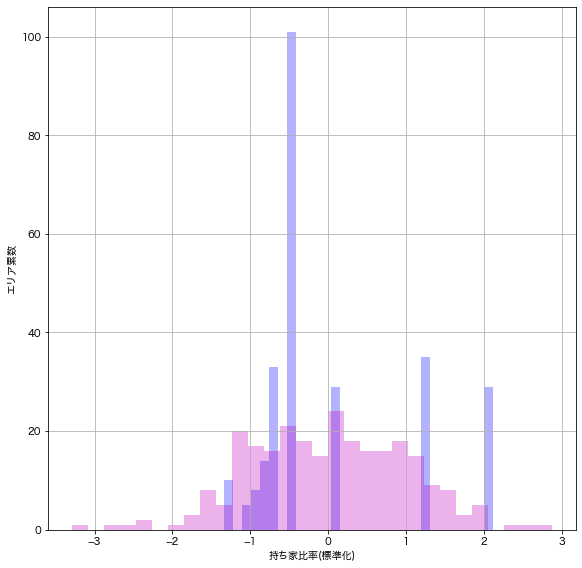

In [239]:
import matplotlib as mpl
import matplotlib.font_manager
mpl.rcParams['font.family'] = 'Hiragino Sans'

fig = plt.figure()
df2['自営業主比率(標準化)'].hist(bins=30,alpha=0.3, histtype='stepfilled', color='b', label='A')
plt.xlabel("自営業主比率(標準化)")
plt.tight_layout() # グラフ同士が重ならないようにする関数
plt.show() # グラフの表示

df2['持ち家比率(標準化)'].hist(bins=30,alpha=0.3, histtype='stepfilled', color='m', label='A')
plt.xlabel("持ち家比率(標準化)")
plt.ylabel("エリア累数")

## クラスタリング

In [271]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit(df3)
df2['クラスター番号'] = clusters.labels_
print(df2['クラスター番号'].unique()) # 付与したクラスターの番号を表示

[1 3 4 2 0]


<ipython-input-271-f6505041b7ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['クラスター番号'] = clusters.labels_


### クラスタリングの可視化

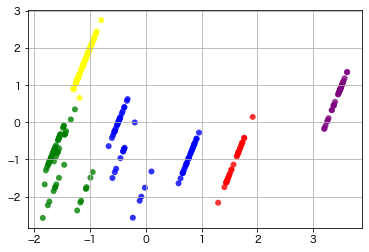

In [252]:
from sklearn.decomposition import PCA
X = df3
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["クラスター番号"] = df2["クラスター番号"]

import matplotlib.pyplot as plt
%matplotlib inline
colors = ['red','blue','yellow','purple','green']
for i in df2["クラスター番号"].unique():
    tmp = pca_df.loc[pca_df["クラスター番号"] == i]
    plt.scatter(tmp[0],tmp[1],alpha=0.8, c=colors[i], edgecolors='none')
    plt.grid(True)

In [272]:
#各クラスターごとの平均
avg0 = df2.groupby('クラスター番号').mean()
avg1 = avg0.transpose()
avg1

クラスター番号,0,1,2,3,4
45~64才の割合(標準化),1.397184,0.568134,-1.144226,0.964167,-0.538820
65才以上の割合(標準化),0.422794,0.590709,-1.502942,0.620660,0.469058
700~1000万の割合（標準化）,-0.427382,0.071905,-0.143999,2.212012,-0.952063
1000万以上の割合(標準化),0.146910,-0.199796,0.027598,2.176267,-1.091236
持ち家比率(標準化),-0.109960,-0.058511,0.488897,0.477227,-0.686813
自営業主比率(標準化),2.113237,-0.487388,-0.447113,1.275370,-0.665534


In [303]:
dfx.sort_values(by=['持ち家比率'], ascending=False)

,市区町村名,大字・町名,字・丁目名,45~64才の割合,65才以上の割合,700~1000万の割合,1000万以上の割合,持ち家比率,自営業主比率,クラスター番号
253,大田区,田園調布,3,0.325819,0.287548,0.125916,0.086897,0.861401,0.113287,1
163,世田谷区,成城,4,0.255927,0.210594,0.139883,0.166099,0.831245,0.127462,2
100,渋谷区,広尾,4,0.310381,0.254726,0.132591,0.171031,0.794521,0.185065,0
164,世田谷区,成城,5,0.255927,0.210594,0.139883,0.166099,0.761051,0.127462,2
254,大田区,田園調布,4,0.325819,0.287548,0.125916,0.086897,0.758962,0.113287,1
70,新宿区,市谷砂土原町,1,0.267315,0.249552,0.123515,0.123632,0.752294,0.118637,2
191,世田谷区,上野毛,3,0.255927,0.210594,0.139883,0.166099,0.751864,0.127462,2
170,世田谷区,深沢,2,0.255927,0.210594,0.139883,0.166099,0.742305,0.127462,2
44,港区,南青山,7,0.301131,0.259203,0.198305,0.265382,0.731877,0.166173,3
42,港区,南青山,5,0.301131,0.259203,0.198305,0.265382,0.730318,0.166173,3


<Figure size 432x288 with 0 Axes>

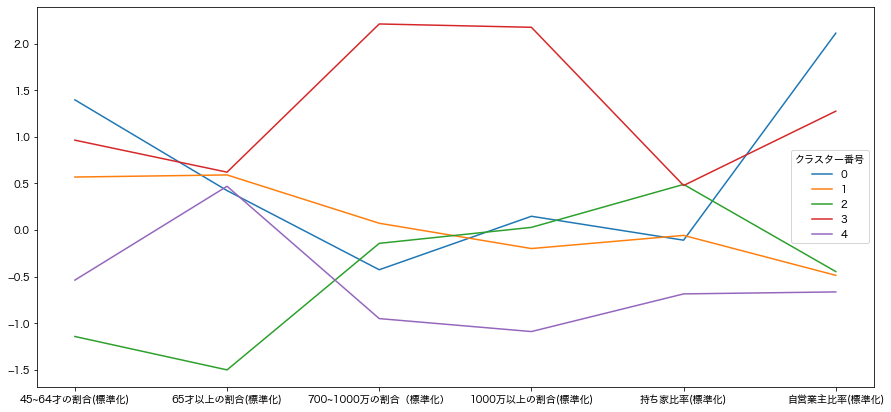

In [254]:
# プロットした図を出力
matplotlib.use('Agg') 
fig = plt.figure()

fig, ax = plt.subplots(figsize=(15,7))
avg1.plot(ax=ax)

plt.savefig('figure1.png')

In [317]:
# 他者向けに標準化していないカラムを利用
clusters = kmeans.fit(df3)
dfx['クラスター番号'] = clusters.labels_

<ipython-input-317-682d58536a43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['クラスター番号'] = clusters.labels_


In [315]:
avgx0 = dfx.groupby('クラスター番号').mean().reset_index()
avgx1 = avgx0.transpose()
avgx1

,0,1,2,3,4
クラスター番号,0.000000,1.000000,2.000000,3.000000,4.000000
45~64才の割合,0.310381,0.292671,0.256092,0.301131,0.269024
65才以上の割合,0.254726,0.258525,0.211158,0.259203,0.255773
700~1000万の割合,0.132591,0.145022,0.139646,0.198305,0.119527
1000万以上の割合,0.171031,0.154911,0.165483,0.265382,0.113465
持ち家比率,0.510693,0.516751,0.581200,0.579826,0.442777
自営業主比率,0.185065,0.126426,0.127334,0.166173,0.122409


In [319]:
# エクセルにアウトプット
avgx1.to_excel('aa.xlsx')

In [318]:
# エクセルにアウトプット
dfx.to_excel('クラスタリング結果.xlsx') 

# 地図上で色分け
geopandasをインストール

In [22]:
pip install geopandas
# conda install geopandas

## 地図データをインストール

In [23]:
input_path = "shapefile" # 展開先フォルダ名

# e-stat 国勢調査 小地域（町丁・字等別） 東京都全域
shapefile_url = "https://www.e-stat.go.jp/gis/statmap-search/data?dlserveyId=A002005212015&code=13&coordSys=1&format=shape&downloadType=5"
shapefile_name = "tokyo.zip"

# ダウンロード
from urllib.request import urlretrieve
urlretrieve(url=shapefile_url, filename=shapefile_name)

# 解凍
import zipfile
with zipfile.ZipFile(shapefile_name) as existing_zip:
    existing_zip.extractall(input_path)

# ファイル名を取得
import os
files = os.listdir(input_path)
shapefile = [file for file in files if ".shp" in file][0]
print(f"downloaded shapefile: {shapefile}")

# 読み込み
import geopandas as gpd
shapefile_path = os.path.join(input_path, shapefile)
maps = gpd.read_file(shapefile_path, encoding='cp932')
print(f"{shapefile_path} is loaded")

# 東京都の島嶼部を除く
# import pandas as pd
islands = ['大島町', '利島村', '新島村', '神津島村', '三宅村', '御蔵島村', '八丈町', '青ヶ島村', '小笠原村']
is_not_islands = [maps["CITY_NAME"] != island for island in islands]
is_not_islands = pd.concat(is_not_islands, axis=1).all(axis=1)
maps = maps.loc[is_not_islands, :]

# 陸地だけにする
maps = maps.loc[maps["HCODE"] == 8101, :]

# 23区のみに変える
maps = maps[maps['CITY_NAME'].str.contains('区')]

downloaded shapefile: h27ka13.shp
shapefile/h27ka13.shp is loaded


In [81]:
# "S_NAME"列の全角数値を変換
!python3.8 -m pip install --upgrade pip # Gitから日本語変換できるライブラリをインストール
!pip install jaconv
import jaconv
L = []

for i in maps['S_NAME']:
    a = jaconv.z2h(i,digit=True, ascii=True)
    L.append(a)

maps['S_NAME'] = L

In [82]:
# 結合するために新しく結合列を作成する
new = maps['S_NAME'].str.split("丁", n = 1, expand = True)
maps['住所1'] = new[0]

In [255]:
maps["S_NAME"]

4       丸の内1丁目
5       丸の内2丁目
6       丸の内3丁目
7       大手町1丁目
8       大手町2丁目
         ...  
3191    谷河内2丁目
3192    東松本1丁目
3193    東松本2丁目
3194    西篠崎1丁目
3195    西篠崎2丁目
Name: S_NAME, Length: 3151, dtype: object

## 2つのデータフレームを結合

In [258]:
df4 = df2[['字・丁目名','住所1','クラスター番号']]

In [259]:
df5 = pd.merge(maps, df4, on='住所1', how='left')
df5['クラスター番号'].fillna(-1,inplace=True) #高級住宅街とカウントされず、df4に入っていないエリアのクラスター番号を-1とする

<Figure size 432x288 with 0 Axes>

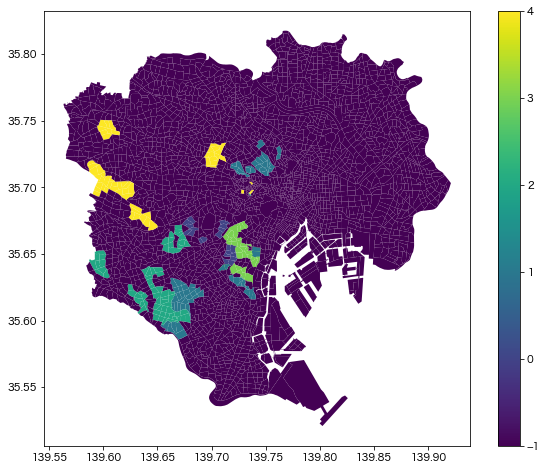

In [298]:
# プロットした図を出力
matplotlib.use('Agg') 
fig = plt.figure()

df5.plot(column= "クラスター番号", legend=True, figsize=[10,8], cmap='viridis') #色が優劣を示すものではない

plt.savefig('figure.png')

### 値のラベルをつけた図

<ipython-input-294-65db8bc7a7fa>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=round(row["クラスター番号"], 2), xy=row["coords"], horizontalalignment="center")


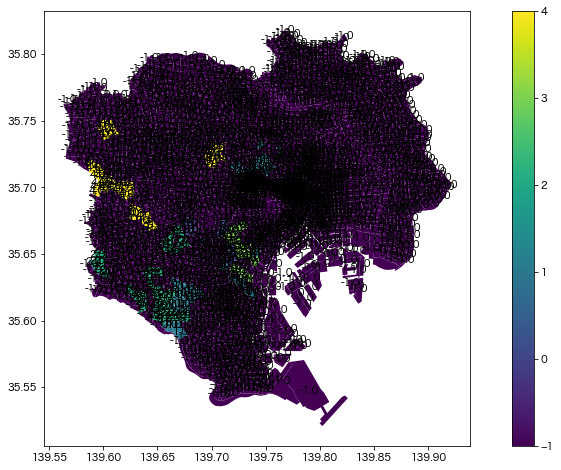

In [294]:
# 値ラベル用にgeometryから当該ポリゴン内のある地点を取得
df5["coords"] = df5["geometry"].apply(lambda x: x.representative_point().coords[:])
df5["coords"] = [coords[0] for coords in df5["coords"]]

df5.plot(column= "クラスター番号", legend=True, figsize=[15,8], cmap='viridis')

# 値ラベル
for i, row in df5.iterrows():
    plt.annotate(s=round(row["クラスター番号"], 2), xy=row["coords"], horizontalalignment="center")

# Google Mapに色付け（停止中→APIがいいかも）
https://medium.com/future-vision/google-maps-in-python-part-2-393f96196eaf

In [32]:
pip install ipyleaflet

Note: you may need to restart the kernel to use updated packages.


In [33]:
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl)

from ipywidgets import Text, HTML
from branca.colormap import linear
# import geopandas as gpd
import json

In [46]:
import folium

In [ ]:
geo_data='https://raw.githubusercontent.com/niiyz/JapanCityGeoJson/master/geojson/13/tokyo23.json'

In [ ]:
layer = Choropleth(geo_data=df, # GeoJSONファイル
                        name = 'choropleth', # map名
                        data = df5, # 点数データ
                        columns=['geometry', 'クラスター番号'], # 点数データのkey列とvalue列を指定
                        key_on='id', # GeoJSONファイル内のキーを指定
                        fill_opacity=0.7, 
                        line_opacity=0.2,
                        line_color='red',
                        fill_color='BuPu').add_to(m)

#image.add_layer(layer)
#image
LayerControl().add_to(m)

In [50]:
#ダウンロードしたjsonファイルを利用する
geojson = '東京都豊島区.json'
tokyo23_location = [35.658593, 139.745441] # 地図の中心を設定する

In [293]:
m = folium.Map(location=tokyo23_location,tiles='openstreetmap',zoom_start=13) # 縮尺はデフォルトの10
m